# physionet2012 전처리 delta 추가 데이터 가져오기

In [10]:
# colab설정

from google.colab import drive
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# import libraries
import warnings
warnings.simplefilter('ignore')

pd.set_option('display.max_columns', None)

drive.mount('/content/drive')
path = '/content/drive/MyDrive/black_swan_physionet/'
os.chdir(path)

file = 'train_done_preprocessing_scaling_delta_cols.csv'
file2 = 'valid_done_preprocessing_scaling_delta_cols.csv'
file3 = 'test_done_preprocessing_scaling_delta_cols.csv'

train_df = pd.read_csv(path+file)
valid_df = pd.read_csv(path+file2)
test_df = pd.read_csv(path+file3)

maxlen = len(train_df[train_df['pid'] == train_df['pid'][0]])
print(maxlen)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
70


In [11]:
# # 전처리된 데이터 가져오기

# import numpy as np
# import pandas as pd

# # import libraries
# import warnings
# warnings.simplefilter('ignore')

# pd.set_option('display.max_columns', None)

# path = '/Users/jsha/gjai/final_project/black_swan_physionet/'
# file = 'train_done_preprocessing_scaling_delta_cols.csv'
# file2 = 'valid_done_preprocessing_scaling_delta_cols.csv'
# file3 = 'test_done_preprocessing_scaling_delta_cols.csv'

# train_df = pd.read_csv(path+file)
# valid_df = pd.read_csv(path+file2)
# test_df = pd.read_csv(path+file3)

# maxlen = len(train_df[train_df['pid'] == train_df['pid'][0]])
# print(maxlen)

In [12]:
test_df

,pid,age,Gender,ALP,ALT,AST,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,FiO2,GCS,Glucose,HCO3,HCT,HR,K,Lactate,Mg,Na,PaCO2,PaO2,Platelets,RR,SPO2,BT,TroponinI,TroponinT,Urine,WBC,pH,MechVent,survival,SBP,DBP,MBP,male,female,surv_los,LOS,labels,time_diff,ICUType_1.0,ICUType_2.0,ICUType_3.0,ICUType_4.0,age_delta,ALP_delta,ALT_delta,AST_delta,Albumin_delta,BUN_delta,Bilirubin_delta,Cholesterol_delta,Creatinine_delta,FiO2_delta,GCS_delta,Glucose_delta,HCO3_delta,HCT_delta,HR_delta,K_delta,Lactate_delta,Mg_delta,Na_delta,PaCO2_delta,PaO2_delta,Platelets_delta,RR_delta,SPO2_delta,BT_delta,TroponinI_delta,TroponinT_delta,Urine_delta,WBC_delta,pH_delta,MechVent_delta,SBP_delta,DBP_delta,MBP_delta,male_delta,female_delta,time_diff_delta,ICUType_1.0_delta,ICUType_2.0_delta,ICUType_3.0_delta,ICUType_4.0_delta
0,135089.0,1.00,1.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.000000,0.00,0.297162,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-1.0,0.000000,0.000000,0.000000,0.0,0.0,-7.0,6.0,0.0,0.653654,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.00,0.000000,0.000000,0.0000,0.0,0.0,0.000000,0.0,0.000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,135089.0,1.00,1.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.000000,0.00,0.297162,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-1.0,0.000000,0.000000,0.000000,0.0,0.0,-7.0,6.0,0.0,0.653654,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.00,0.000000,0.000000,0.0000,0.0,0.0,0.000000,0.0,0.000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,135089.0,1.00,1.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.000000,0.00,0.297162,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-1.0,0.000000,0.000000,0.000000,0.0,0.0,-7.0,6.0,0.0,0.653654,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.00,0.000000,0.000000,0.0000,0.0,0.0,0.000000,0.0,0.000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,135089.0,1.00,1.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.000000,0.00,0.297162,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-1.0,0.000000,0.000000,0.000000,0.0,0.0,-7.0,6.0,0.0,0.653654,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.00,0.000000,0.000000,0.0000,0.0,0.0,0.000000,0.0,0.000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,135089.0,1.00,1.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.000000,0.00,0.297162,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-1.0,0.000000,0.000000,0.000000,0.0,0.0,-7.0,6.0,0.0,0.653654,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.00,0.000000,0.000000,0.0000,0.0,0.0,0.000000,0.0,0.000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [13]:
basic_columns = ['age',
 'ALP',
 'ALT',
 'AST',
 'Albumin',
 'BUN',
 'Bilirubin',
 'Cholesterol',
 'Creatinine',
 'FiO2',
 'GCS',
 'Glucose',
 'HCO3',
 'HCT',
 'HR',
 'K',
 'Lactate',
 'Mg',
 'Na',
 'PaCO2',
 'PaO2',
 'Platelets',
 'RR',
 'SPO2',
 'BT',
 'TroponinI',
 'TroponinT',
 'Urine',
 'WBC',
 'pH',
 'MechVent',
 'SBP',
 'DBP',
 'MBP',
 'male',
 'female',
 'ICUType_1.0',
 'ICUType_2.0',
 'ICUType_3.0',
 'ICUType_4.0']

## select features

In [14]:
# 1. 기본 cols
select_cols = basic_columns
print(select_cols)


# # 2. 기본 cols + delta cols
# select_cols = basic_columns + [col for col in train_df.columns if col.endswith('_delta')]
# print(select_cols)


# # 3. only delta(of basic)
# select_cols = [col for col in train_df.columns if col.endswith('_delta')]
# print(select_cols)


# # 4. feature_importance cols
# important_columns = ['age', 'AST', 'Albumin', 'BUN', 'Bilirubin', 'Creatinine', 'GCS', 'Lactate', 'Platelets', 'WBC']
# select_cols = important_columns
# print(select_cols)


# # 5. feature importanc + delta cols
# select_cols = important_columns + [col+'_delta' for col in important_columns]
# print(select_cols)


# # 6. only delta cols(of feature_importance)
# select_cols = [col+'_delta' for col in important_columns]
# print(select_cols)

# # 7. vital_columns
# vital_columns = ['HR', 'RR', 'SPO2', 'BT', 'SBP', 'DBP', 'MBP']
# select_cols = vital_columns
# print(select_cols)

# # 8. vital_columns + delta cols
# select_cols = vital_columns + [col+'_delta' for col in vital_columns]
# print(select_cols)

# # 9. only delta cols(of vital_columns)
# select_cols = [col+'_delta' for col in vital_columns]
# print(select_cols)



['age', 'ALP', 'ALT', 'AST', 'Albumin', 'BUN', 'Bilirubin', 'Cholesterol', 'Creatinine', 'FiO2', 'GCS', 'Glucose', 'HCO3', 'HCT', 'HR', 'K', 'Lactate', 'Mg', 'Na', 'PaCO2', 'PaO2', 'Platelets', 'RR', 'SPO2', 'BT', 'TroponinI', 'TroponinT', 'Urine', 'WBC', 'pH', 'MechVent', 'SBP', 'DBP', 'MBP', 'male', 'female', 'ICUType_1.0', 'ICUType_2.0', 'ICUType_3.0', 'ICUType_4.0']


In [15]:
# labels 컬럼 인덱스 찾기
inx = test_df.columns.get_indexer(['labels'])
print(inx)

# X, y 분리
y_train = train_df['labels']
X_train = train_df[select_cols]
# print(X_train.shape)
# print(y_train.shape)

y_valid = valid_df['labels']
X_valid = valid_df[select_cols]
# print(X_valid.shape)
# print(y_valid.shape)

y_test = test_df['labels']
X_test = test_df[select_cols]
# print(X_test.shape)
# print(y_test.shape)

X_train_3d = X_train.to_numpy().reshape((-1, maxlen, X_train.shape[-1]))
# print(X_train_3d.shape)
y_train_3d = y_train.to_numpy()[::maxlen]
# print(y_train_3d.shape)

X_valid_3d = X_valid.to_numpy().reshape((-1, maxlen, X_valid.shape[-1]))
# print(X_valid_3d.shape)
y_valid_3d = y_valid.to_numpy()[::maxlen]
# print(y_valid_3d.shape)

X_test_3d = X_test.to_numpy().reshape((-1, maxlen, X_test.shape[-1]))
# print(X_test_3d.shape)
y_test_3d = y_test.to_numpy()[::maxlen]
# print(y_test_3d.shape)


[41]


In [16]:
X_train_3d = X_train.to_numpy().reshape((-1, maxlen, X_train.shape[-1]))
print(X_train_3d.shape)
y_train_3d = y_train.to_numpy()[::maxlen]
print(y_train_3d.shape)

X_valid_3d = X_valid.to_numpy().reshape((-1, maxlen, X_valid.shape[-1]))
print(X_valid_3d.shape)
y_valid_3d = y_valid.to_numpy()[::maxlen]
print(y_valid_3d.shape)

X_test_3d = X_test.to_numpy().reshape((-1, maxlen, X_test.shape[-1]))
print(X_test_3d.shape)
y_test_3d = y_test.to_numpy()[::maxlen]
print(y_test_3d.shape)

(3240, 70, 40)
(3240,)
(360, 70, 40)
(360,)
(400, 70, 40)
(400,)


# Model 설계 

## CNN: 가장 잘 나와서 계속 쓰고 있던 모델

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_20 (Conv1D)          (None, 67, 32)            5152      
                                                                 
 dropout_50 (Dropout)        (None, 67, 32)            0         
                                                                 
 conv1d_21 (Conv1D)          (None, 66, 32)            2080      
                                                                 
 dropout_51 (Dropout)        (None, 66, 32)            0         
                                                                 
 dense_50 (Dense)            (None, 66, 64)            2112      
                                                                 
 dropout_52 (Dropout)        (None, 66, 64)            0         
                                                                 
 flatten_10 (Flatten)        (None, 4224)            

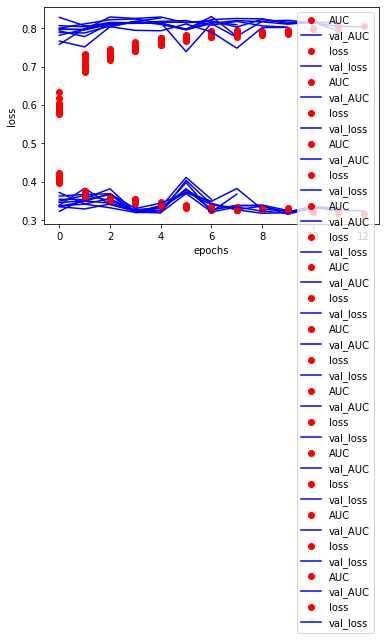

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv1D
import tensorflow as tf

tf.random.set_seed(1234)

def cnn_model():

    feature_dim = X_train_3d.shape[-1]

    cnn_model = Sequential()
    cnn_model.add(Conv1D(filters=32, kernel_size=4, activation='relu', input_shape=(maxlen, feature_dim)))
    cnn_model.add(Dropout(0.2))
    cnn_model.add(Conv1D(filters=32, kernel_size=2, activation='relu'))
    cnn_model.add(Dropout(0.2))
    cnn_model.add(Dense(64, activation='relu'))
    cnn_model.add(Dropout(0.5))
    cnn_model.add(Flatten())
    cnn_model.add(Dense(128, activation='relu'))
    cnn_model.add(Dropout(0.2))
    cnn_model.add(Dense(32, activation='relu'))
    cnn_model.add(Dropout(0.5))
    cnn_model.add(Dense(8, activation='relu'))
    cnn_model.add(Dense(1, activation='sigmoid'))

    model_weights = cnn_model.get_weights()

    cnn_model.summary()

    cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc', 'AUC'])

    # 모델 학습하기

    from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

    epochs = 100
    batch_size = 20
    model_name = 'chp_cnn_model.h5'

    early_stopping = EarlyStopping(monitor='val_auc', patience=4, verbose=1)
    checkpoint = ModelCheckpoint(path+model_name, monitor='val_auc', save_best_only=True)

    cnn_history = cnn_model.fit(X_train_3d, y_train_3d, epochs=epochs, batch_size=batch_size, 
                        validation_data=(X_valid_3d, y_valid_3d), callbacks=[early_stopping, checkpoint])


    # epoch별 model acc 비교하기 

    import matplotlib.pyplot as plt

    history = cnn_history.history
    history
    loss = history['loss']
    acc = history['acc']
    auc = history['auc']
    val_loss = history['val_loss']
    val_acc = history['val_acc']
    val_auc = history['val_auc']
    length = len(val_loss)

    plt.plot(range(length), auc, 'ro', label='AUC')
    plt.plot(range(length), val_auc, 'b-', label='val_AUC')
    plt.xlabel('epochs')
    plt.ylabel('AUC')
    plt.legend()

    # epoch별 모델 loss 확인하기

    plt.plot(range(length), loss, 'ro', label='loss')
    plt.plot(range(length), val_loss, 'b-', label='val_loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend()

    # test loss, acc, auc 구하기1
    test_loss, test_acc, test_auc = cnn_model.evaluate(X_test_3d, y_test_3d)
    print(f'test_acc: {test_acc:.4f}')
    print(f'test_auc: {test_auc:.4f}')
    
    return model_weights, round(test_auc,4)


    # # auroc 구하기2
    # from sklearn.metrics import roc_auc_score

    # test_pred = cnn_model.predict(X_test_3d)
    # auc = roc_auc_score(y_test_3d, test_pred)

    # print(f'acc_test: {test_acc:.4f}')
    # print(f'auc_score_test: {auc:.4f}')

weights_list = []
auroc_list = []
for i in range(10):
    weights, auroc = cnn_model()
    weights_list.append(weights)
    auroc_list.append(auroc)


    

In [18]:
print(np.mean(auroc_list))
print(weights_list[0])

0.8278899999999998
[array([[[ 0.01098101, -0.03908122,  0.02356458, ..., -0.12792647,
         -0.07333723, -0.05620071],
        [-0.05272354, -0.08861867,  0.09386458, ..., -0.06321575,
          0.12385634, -0.03936293],
        [-0.03043736,  0.06888911,  0.0366552 , ...,  0.01634881,
          0.12845239,  0.0833519 ],
        ...,
        [-0.02456331,  0.00945033,  0.00565886, ..., -0.00287391,
         -0.03114444, -0.08992983],
        [-0.05478205,  0.09667709, -0.08059182, ..., -0.12315472,
          0.00209677, -0.10858092],
        [-0.11815255,  0.02888501, -0.00567408, ..., -0.05288649,
          0.13289732,  0.0596171 ]],

       [[-0.06781767,  0.05928144,  0.01747775, ...,  0.02976573,
         -0.10272803, -0.00986779],
        [ 0.10502866,  0.06325461, -0.04339325, ..., -0.04992899,
          0.10781085, -0.12199955],
        [-0.09181909,  0.11649004,  0.11074659, ...,  0.04928206,
         -0.1442604 , -0.06527635],
        ...,
        [-0.05374216,  0.07310182,

## GRU model from jiho

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 70, 50)            13800     
                                                                 
 dropout_100 (Dropout)       (None, 70, 50)            0         
                                                                 
 gru_1 (GRU)                 (None, 70, 60)            20160     
                                                                 
 dropout_101 (Dropout)       (None, 70, 60)            0         
                                                                 
 gru_2 (GRU)                 (None, 70, 80)            34080     
                                                                 
 dropout_102 (Dropout)       (None, 70, 80)            0         
                                                                 
 gru_3 (GRU)                 (None, 120)             

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 70, 50)            13800     
                                                                 
 dropout_104 (Dropout)       (None, 70, 50)            0         
                                                                 
 gru_5 (GRU)                 (None, 70, 60)            20160     
                                                                 
 dropout_105 (Dropout)       (None, 70, 60)            0         
                                                                 
 gru_6 (GRU)                 (None, 70, 80)            34080     
                                                                 
 dropout_106 (Dropout)       (None, 70, 80)            0         
                                                                 
 gru_7 (GRU)                 (None, 120)             

test_acc: 0.8850
test_auc: 0.8154


Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_8 (GRU)                 (None, 70, 50)            13800     
                                                                 
 dropout_108 (Dropout)       (None, 70, 50)            0         
                                                                 
 gru_9 (GRU)                 (None, 70, 60)            20160     
                                                                 
 dropout_109 (Dropout)       (None, 70, 60)            0         
                                                                 
 gru_10 (GRU)                (None, 70, 80)            34080     
                                                                 
 dropout_110 (Dropout)       (None, 70, 80)            0         
                                                                 
 gru_11 (GRU)                (None, 120)             

test_acc: 0.8725
test_auc: 0.8173


Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_12 (GRU)                (None, 70, 50)            13800     
                                                                 
 dropout_112 (Dropout)       (None, 70, 50)            0         
                                                                 
 gru_13 (GRU)                (None, 70, 60)            20160     
                                                                 
 dropout_113 (Dropout)       (None, 70, 60)            0         
                                                                 
 gru_14 (GRU)                (None, 70, 80)            34080     
                                                                 
 dropout_114 (Dropout)       (None, 70, 80)            0         
                                                                 
 gru_15 (GRU)                (None, 120)             

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_16 (GRU)                (None, 70, 50)            13800     
                                                                 
 dropout_116 (Dropout)       (None, 70, 50)            0         
                                                                 
 gru_17 (GRU)                (None, 70, 60)            20160     
                                                                 
 dropout_117 (Dropout)       (None, 70, 60)            0         
                                                                 
 gru_18 (GRU)                (None, 70, 80)            34080     
                                                                 
 dropout_118 (Dropout)       (None, 70, 80)            0         
                                                                 
 gru_19 (GRU)                (None, 120)             

test_acc: 0.8725
test_auc: 0.8283


Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_20 (GRU)                (None, 70, 50)            13800     
                                                                 
 dropout_120 (Dropout)       (None, 70, 50)            0         
                                                                 
 gru_21 (GRU)                (None, 70, 60)            20160     
                                                                 
 dropout_121 (Dropout)       (None, 70, 60)            0         
                                                                 
 gru_22 (GRU)                (None, 70, 80)            34080     
                                                                 
 dropout_122 (Dropout)       (None, 70, 80)            0         
                                                                 
 gru_23 (GRU)                (None, 120)             

test_acc: 0.8725
test_auc: 0.8193


Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_24 (GRU)                (None, 70, 50)            13800     
                                                                 
 dropout_124 (Dropout)       (None, 70, 50)            0         
                                                                 
 gru_25 (GRU)                (None, 70, 60)            20160     
                                                                 
 dropout_125 (Dropout)       (None, 70, 60)            0         
                                                                 
 gru_26 (GRU)                (None, 70, 80)            34080     
                                                                 
 dropout_126 (Dropout)       (None, 70, 80)            0         
                                                                 
 gru_27 (GRU)                (None, 120)             

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_28 (GRU)                (None, 70, 50)            13800     
                                                                 
 dropout_128 (Dropout)       (None, 70, 50)            0         
                                                                 
 gru_29 (GRU)                (None, 70, 60)            20160     
                                                                 
 dropout_129 (Dropout)       (None, 70, 60)            0         
                                                                 
 gru_30 (GRU)                (None, 70, 80)            34080     
                                                                 
 dropout_130 (Dropout)       (None, 70, 80)            0         
                                                                 
 gru_31 (GRU)                (None, 120)             

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_32 (GRU)                (None, 70, 50)            13800     
                                                                 
 dropout_132 (Dropout)       (None, 70, 50)            0         
                                                                 
 gru_33 (GRU)                (None, 70, 60)            20160     
                                                                 
 dropout_133 (Dropout)       (None, 70, 60)            0         
                                                                 
 gru_34 (GRU)                (None, 70, 80)            34080     
                                                                 
 dropout_134 (Dropout)       (None, 70, 80)            0         
                                                                 
 gru_35 (GRU)                (None, 120)             

test_acc: 0.8625
test_auc: 0.8239


Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_36 (GRU)                (None, 70, 50)            13800     
                                                                 
 dropout_136 (Dropout)       (None, 70, 50)            0         
                                                                 
 gru_37 (GRU)                (None, 70, 60)            20160     
                                                                 
 dropout_137 (Dropout)       (None, 70, 60)            0         
                                                                 
 gru_38 (GRU)                (None, 70, 80)            34080     
                                                                 
 dropout_138 (Dropout)       (None, 70, 80)            0         
                                                                 
 gru_39 (GRU)                (None, 120)             

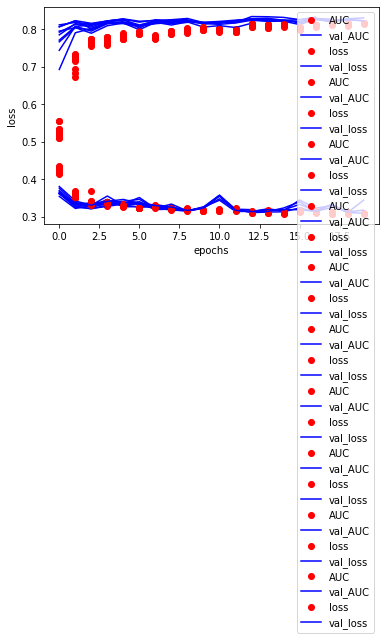

In [19]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout

tf.random.set_seed(1234)

def gru_model():

    feature_dim = X_train_3d.shape[-1]

    regression_GRU = Sequential()
    regression_GRU.add(GRU(units=50, activation="relu", return_sequences=True, input_shape=(maxlen, feature_dim)))
    regression_GRU.add(Dropout(0.2))

    regression_GRU.add(GRU(units=60, activation="relu", return_sequences=True))
    regression_GRU.add(Dropout(0.3))

    regression_GRU.add(GRU(units=80, activation="relu", return_sequences=True))
    regression_GRU.add(Dropout(0.4))

    regression_GRU.add(GRU(units=120, activation="relu"))
    regression_GRU.add(Dropout(0.5))
    regression_GRU.add(Dense(1, activation='sigmoid'))

    regression_GRU.summary()

    regression_GRU.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc', 'AUC'])

    # 모델 학습하기

    from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

    epochs = 20
    batch_size = 40
    model_name = 'gru_model.h5'

    early_stopping = EarlyStopping(monitor='val_auc', patience=4, verbose=1)
    checkpoint = ModelCheckpoint(path+model_name, monitor='val_auc', save_best_only=True)

    history = regression_GRU.fit(X_train_3d, y_train_3d, epochs=epochs, batch_size=batch_size, 
                        validation_data=(X_valid_3d, y_valid_3d), callbacks=[early_stopping, checkpoint])

    # epoch별 model acc 비교하기 

    import matplotlib.pyplot as plt

    history = history.history
    history
    loss = history['loss']
    acc = history['acc']
    auc = history['auc']
    val_loss = history['val_loss']
    val_acc = history['val_acc']
    val_auc = history['val_auc']
    length = len(val_loss)

    plt.plot(range(length), auc, 'ro', label='AUC')
    plt.plot(range(length), val_auc, 'b-', label='val_AUC')
    plt.xlabel('epochs')
    plt.ylabel('AUC')
    plt.legend()

    # epoch별 모델 loss 확인하기

    plt.plot(range(length), loss, 'ro', label='loss')
    plt.plot(range(length), val_loss, 'b-', label='val_loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend()

    # test loss, acc, auc 구하기1
    test_loss, test_acc, test_auc = regression_GRU.evaluate(X_test_3d, y_test_3d)
    print(f'test_acc: {test_acc:.4f}')
    print(f'test_auc: {test_auc:.4f}')

    weights = regression_GRU.get_weights()

    return weights, round(test_auc,4)


weights_list = []
auroc_list = []
for i in range(10):
    weights, auroc = gru_model()
    weights_list.append(weights)
    auroc_list.append(auroc)

In [20]:
print(np.mean(auroc_list))
print(weights_list[0])

0.8194100000000001
[array([[-0.04359925, -0.05207783, -0.00749296, ...,  0.06477668,
         0.05545161,  0.04384222],
       [ 0.18273284,  0.05641264,  0.11348827, ..., -0.11281431,
        -0.03504232, -0.03115883],
       [ 0.20007339, -0.17373903, -0.24461055, ..., -0.0121949 ,
        -0.09950791, -0.20395377],
       ...,
       [-0.00121039,  0.1311318 ,  0.01040539, ...,  0.17807253,
         0.20781483,  0.04891036],
       [ 0.06611691,  0.14633094, -0.22072634, ...,  0.14383806,
        -0.04776761, -0.22270522],
       [ 0.09094216, -0.04714056, -0.32100397, ..., -0.21663041,
        -0.15120141,  0.11877905]], dtype=float32), array([[ 0.08976486,  0.03984412, -0.1792627 , ..., -0.16563456,
        -0.12377182, -0.07052565],
       [ 0.1811009 , -0.02567583,  0.0851451 , ..., -0.11137956,
        -0.03705473, -0.04071756],
       [-0.00462574,  0.04245498, -0.01582314, ..., -0.06812389,
         0.06682174,  0.09180724],
       ...,
       [ 0.13752931,  0.00975071,  0.07

## lstm_model

Epoch 1/20
81/81 [==============================] - 5s 21ms/step - loss: 0.4513 - acc: 0.8599 - auc: 0.5105 - val_loss: 0.3991 - val_acc: 0.8639 - val_auc: 0.7281
Epoch 2/20
81/81 [==============================] - 1s 9ms/step - loss: 0.4061 - acc: 0.8682 - auc: 0.5430 - val_loss: 0.3760 - val_acc: 0.8639 - val_auc: 0.7731
Epoch 3/20
81/81 [==============================] - 1s 9ms/step - loss: 0.3808 - acc: 0.8682 - auc: 0.6536 - val_loss: 0.3335 - val_acc: 0.8667 - val_auc: 0.7942
Epoch 4/20
81/81 [==============================] - 1s 9ms/step - loss: 0.3695 - acc: 0.8667 - auc: 0.7011 - val_loss: 0.3724 - val_acc: 0.8639 - val_auc: 0.8047
Epoch 5/20
81/81 [==============================] - 1s 9ms/step - loss: 0.3518 - acc: 0.8670 - auc: 0.7387 - val_loss: 0.3345 - val_acc: 0.8444 - val_auc: 0.8188
Epoch 6/20
81/81 [==============================] - 1s 9ms/step - loss: 0.3408 - acc: 0.8694 - auc: 0.7616 - val_loss: 0.3347 - val_acc: 0.8528 - val_auc: 0.8149
Epoch 7/20
81/81 [=========

TypeError: ignored

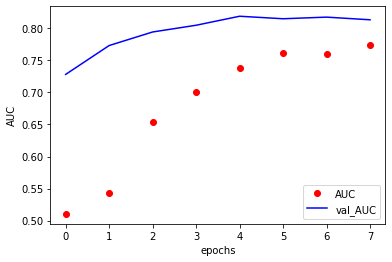

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, LSTM

tf.random.set_seed(1234)

def lstm_model():
    feature_dim = X_train_3d.shape[-1]

    lstm_model = Sequential()
    lstm_model.add(LSTM(64, activation='tanh', input_shape=(maxlen, feature_dim), return_sequences=True))
    lstm_model.add(Dropout(0.2))
    lstm_model.add(LSTM(64, activation='tanh'))
    lstm_model.add(Dropout(0.5))
    lstm_model.add(Dense(32, activation='relu'))
    # lstm_model.add(Flatten())
    lstm_model.add(Dense(8, activation='relu'))
    lstm_model.add(Dropout(0.2))
    lstm_model.add(Dense(1, activation='sigmoid'))

    lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc', 'AUC'])
    
    # 모델 학습하기

    from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

    epochs = 20
    batch_size = 40
    model_name = 'chp_lstm_model.h5'

    early_stopping = EarlyStopping(monitor='val_auc', patience=3, verbose=1)
    checkpoint = ModelCheckpoint(path+model_name, monitor='val_auc', save_best_only=True)

    cnn_history = lstm_model.fit(X_train_3d, y_train_3d, epochs=epochs, batch_size=batch_size, 
                        validation_data=(X_valid_3d, y_valid_3d), callbacks=[early_stopping, checkpoint])

    # epoch별 model acc 비교하기 

    import matplotlib.pyplot as plt

    history = lstm_model.history.history
    history
    loss = history['loss']
    acc = history['acc']
    auc = history['auc']
    val_loss = history['val_loss']
    val_acc = history['val_acc']
    val_auc = history['val_auc']
    length = len(val_loss)

    plt.plot(range(length), auc, 'ro', label='AUC')
    plt.plot(range(length), val_auc, 'b-', label='val_AUC')
    plt.xlabel('epochs')
    plt.ylabel('AUC')
    plt.legend()
    
    # test loss, acc, auc 구하기1
    test_loss, test_acc, test_auc = lstm_model.evaluate(X_test_3d, y_test_3d)
    print(f'test_acc: {test_acc:.4f}')
    print(f'test_auc: {test_auc:.4f}')


weights_list = []
auroc_list = []
for i in range(10):
    weights, auroc = lstm_model()
    weights_list.append(weights)
    auroc_list.append(auroc)

In [ ]:
print(np.mean(auroc_list))
print(weights_list[0])

## bidirectional model

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten, Bidirectional, Input

tf.random.set_seed(1234)

def bidirectional_model():
    max_len = len(X_train_3d.shape[1])
    feature_dim = X_train_3d.shape[-1]

    inp = Input(shape=(max_len, feature_dim))
    hidden = LSTM(64, activation='tanh', return_sequences=True)(inp)
    hidden = Bidirectional(LSTM(64, activation='tanh'))(hidden)
    hidden = Dropout(0.5)(hidden)
    hidden = Dense(32, activation='relu')(hidden)
    hidden = Dropout(0.5)(hidden)
    hidden = Dense(8, activation='relu')(hidden)
    outp = Dense(1, activation='sigmoid')(hidden)

    bidirec_model = Model(inputs=[inp], outputs=[outp])

    bidirec_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc', 'AUC'])

    # 모델 학습하기

    from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

    epochs = 20
    batch_size = 40
    model_name = 'chp_bidirec_model.h5'

    early_stopping = EarlyStopping(monitor='val_auc', patience=4, verbose=1)
    checkpoint = ModelCheckpoint(path+model_name, monitor='val_auc', save_best_only=True)

    history = bidirec_model.fit(X_train_3d, y_train_3d, epochs=epochs, batch_size=batch_size, 
                        validation_data=(X_valid_3d, y_valid_3d), callbacks=[early_stopping, checkpoint])

    # epoch별 model acc 비교하기 

    import matplotlib.pyplot as plt

    history = history.history
    history
    loss = history['loss']
    acc = history['acc']
    auc = history['auc']
    val_loss = history['val_loss']
    val_acc = history['val_acc']
    val_auc = history['val_auc']
    length = len(val_loss)

    plt.plot(range(length), auc, 'ro', label='AUC')
    plt.plot(range(length), val_auc, 'b-', label='val_AUC')
    plt.xlabel('epochs')
    plt.ylabel('AUC')
    plt.legend()

    # test loss, acc, auc 구하기1
    test_loss, test_acc, test_auc = bidirec_model.evaluate(X_test_3d, y_test_3d)
    print(f'test_acc: {test_acc:.4f}')
    print(f'test_auc: {test_auc:.4f}')

    weights = bidirec_model.get_weights()

    return weights, round(test_auc,4)


weights_list = []
auroc_list = []
for i in range(10):
    weights, auroc = bidirectional_model()
    weights_list.append(weights)
    auroc_list.append(auroc)

In [ ]:
print(np.mean(auroc_list))
print(weights_list[0])

## simple dense model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

tf.random.set_seed(1234)

def simple_model():
    max_len = len(X_train_3d.shape[1])
    feature_dim = X_train_3d.shape[-1]

    simple_model = Sequential()
    simple_model.add(Dense(128, activation='relu', input_shape=(maxlen, feature_dim)))
    simple_model.add(Dropout(0.2))
    simple_model.add(Flatten())
    simple_model.add(Dense(64, activation='relu'))
    simple_model.add(Dropout(0.2))
    simple_model.add(Dense(18, activation='relu'))
    simple_model.add(Dense(1, activation='sigmoid'))

    simple_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc', 'AUC'])

    # 모델 학습하기

    from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

    epochs = 20
    batch_size = 40
    model_name = 'chp_simple_model.h5'

    early_stopping = EarlyStopping(monitor='val_auc', patience=4, verbose=1)
    checkpoint = ModelCheckpoint(path+model_name, monitor='val_auc', save_best_only=True)

    cnn_history = simple_model.fit(X_train_3d, y_train_3d, epochs=epochs, batch_size=batch_size, 
                        validation_data=(X_valid_3d, y_valid_3d), callbacks=[early_stopping, checkpoint])

    # epoch별 model acc 비교하기 

    import matplotlib.pyplot as plt

    history = simple_model.history.history
    history
    loss = history['loss']
    acc = history['acc']
    auc = history['auc']
    val_loss = history['val_loss']
    val_acc = history['val_acc']
    val_auc = history['val_auc']
    length = len(val_loss)

    plt.plot(range(length), auc, 'ro', label='AUC')
    plt.plot(range(length), val_auc, 'b-', label='val_AUC')
    plt.xlabel('epochs')
    plt.ylabel('AUC')
    plt.legend()

    # test loss, acc, auc 구하기1
    test_loss, test_acc, test_auc = simple_model.evaluate(X_test_3d, y_test_3d)
    print(f'test_acc: {test_acc:.4f}')
    print(f'test_auc: {test_auc:.4f}')


    weights = simple_model.get_weights()

    return weights, round(test_auc,4)


weights_list = []
auroc_list = []
for i in range(10):
    weights, auroc = simple_model()
    weights_list.append(weights)
    auroc_list.append(auroc)


In [ ]:
print(np.mean(auroc_list))
print(weights_list[0])

In [ ]:
def select_columns(select_cols):
    # labels 컬럼 인덱스 찾기
    inx = test_df.columns.get_indexer(['labels'])
    print(inx)

    # X, y 분리
    y_train = train_df['labels']
    X_train = train_df[select_cols]
    # print(X_train.shape)
    # print(y_train.shape)

    y_valid = valid_df['labels']
    X_valid = valid_df[select_cols]
    # print(X_valid.shape)
    # print(y_valid.shape)

    y_test = test_df['labels']
    X_test = test_df[select_cols]
    # print(X_test.shape)
    # print(y_test.shape)

    X_train_3d = X_train.to_numpy().reshape((-1, maxlen, X_train.shape[-1]))
    # print(X_train_3d.shape)
    y_train_3d = y_train.to_numpy()[::maxlen]
    # print(y_train_3d.shape)

    X_valid_3d = X_valid.to_numpy().reshape((-1, maxlen, X_valid.shape[-1]))
    # print(X_valid_3d.shape)
    y_valid_3d = y_valid.to_numpy()[::maxlen]
    # print(y_valid_3d.shape)

    X_test_3d = X_test.to_numpy().reshape((-1, maxlen, X_test.shape[-1]))
    # print(X_test_3d.shape)
    y_test_3d = y_test.to_numpy()[::maxlen]
    # print(y_test_3d.shape)

    X_train_3d = X_train.to_numpy().reshape((-1, maxlen, X_train.shape[-1]))
    print(X_train_3d.shape)
    y_train_3d = y_train.to_numpy()[::maxlen]
    print(y_train_3d.shape)

    X_valid_3d = X_valid.to_numpy().reshape((-1, maxlen, X_valid.shape[-1]))
    print(X_valid_3d.shape)
    y_valid_3d = y_valid.to_numpy()[::maxlen]
    print(y_valid_3d.shape)

    X_test_3d = X_test.to_numpy().reshape((-1, maxlen, X_test.shape[-1]))
    print(X_test_3d.shape)
    y_test_3d = y_test.to_numpy()[::maxlen]
    print(y_test_3d.shape)

    return X_train_3d, X_valid_3d, X_test_3d, y_train_3d, y_valid_3d, y_test_3d



In [ ]:
model_func_list = [cnn_model, gru_model, lstm_model, bidirectional_model, simple_model]
model_names = ['cnn_model', 'gru_model', 'lstm_model', 'bidirectional_model', 'simple_model']

basic = basic_columns
basic_delta = basic_columns + [col for col in train_df.columns if col.endswith('_delta')]

important = ['age', 'AST', 'Albumin', 'BUN', 'Bilirubin', 'Creatinine', 'GCS', 'Lactate', 'Platelets', 'WBC']
important_delta = important + [col+'_delta' for col in important]

vital = ['HR', 'RR', 'SPO2', 'BT', 'SBP', 'DBP', 'MBP']
vital_delta = vital + [col+'_delta' for col in vital]

select_cols_list = [basic, basic_delta, important_delta, vital, vital_delta]
col_names = ['basic', 'basic_delta', 'important_delta', 'vital', 'vital_delta']
col_dict = {}
for col in zip(col_names, select_cols_list):
    X_tr, X_va, X_te, y_tr, y_va, y_te = select_columns(col)
    model_dict = {}
    for name, model in zip(model_names, model_func_list):
        auroc_10_list = model(X_tr, X_va, X_te, y_tr, y_va, y_te)
        model_dict[name] = auroc_10_list
    col_dict[col] = model_dict


- cnn_mean: 0.8278899999999998
- gru_mean: 0.8194100000000001
